# R vs Python for Data Analytics: A Comparative Walkthrough
### Author: Ebuwa Evbuoma-Fike, Senior Data Scientist in Healthcare
### Last Edited: 2/3/25
### Workshop Date: 2/8/25

## Material for R vs Python Workshop

### Installations and Setup for Google Colab

Google Colab is a free, cloud-based environment to run Python code in a web browser.
More [here](https://research.google.com/colaboratory/faq.html).

1. Either clone the GitHub repository via VS Code or a similar IDE, or download the GitHub repository, to access workshop files in your local environment.

2. Launch https://colab.research.google.com/
You should see a Welcome to Colab page. It prompts you to upload a notebook. If this prompt does not appear, go to File > Upload notebook (see image).
The notebook file is titled, `r_vs_python_for_rladiesstl_technical_workshop_google_colab.ipynb`

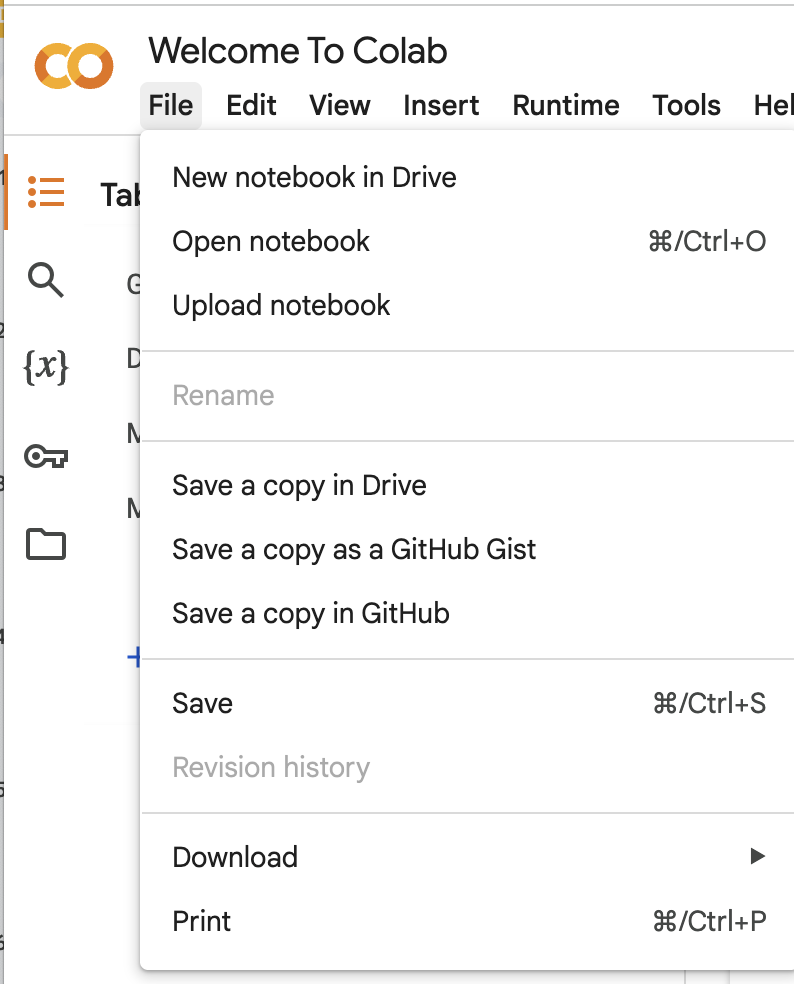


3. Make a copy of this Colab notebook, so you can run code chunks during the workshop, and save any changes made.

4. The code chunk below installs required packages:
*   pandas, a Python library used for data manipulation and analysis.
*   numpy, a Python library with high-level mathematical functions, which integrates well with other Python libraries.
*   rpy2, a Python library which offers a Python interface for programming in R.

In [18]:
# Install libraries
!pip install pandas numpy rpy2

5. Upload the `n_1000_citibike_trips.csv` file to the Colab folder in your browser.

This concludes the setup for this workshop.


### R vs Python for Data Analytics: A Comparative Walkthrough Technical Workshop

There are essentially two popular ways to work with R and Python in a local Python environment:
- A. Work with both languages "interchangeably" using the rpy2 library.
- B. Work distinctly in each language, using the rpy2 library, and, optionally, the r-essentials library.
    - The r-essentials library bundles common R packages, like ggplot2, offering advanced functionality in R.


### A. Working with R and Python, flexibly

#### 1. Import necessary modules:

In [19]:
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter

# Activate automatic conversion between pandas and R
pandas2ri.activate()

#### 2. Convert Python objects to R objects:

- Convert Python lists to R vectors:

In [20]:
python_list = [1, 2, 3, 4, 5]
r_vector = robjects.IntVector(python_list)

- Convert Python dictionaries to R lists:

In [21]:
python_dict = {'a': 1, 'b': 2, 'c': 3}
r_list = robjects.ListVector(python_dict)

#### 3.  Call R functions:

- Use the `robjects.r()` argument to execute R code:

In [22]:
r_result = robjects.r('mean(c(1, 2, 3))')
print(r_result[0])  # Access the result

2.0


- Alternatively, call R functions directly:

In [23]:
r_mean = robjects.r['mean']
r_result = r_mean(r_vector)
print(r_result[0])

3.0


#### 4. Convert R objects back to Python:

- Convert R vectors to Python lists:

In [24]:
python_list = list(r_vector)

#### Example

This example demonstrates how to convert a `pandas` DataFrame to an R data frame and then apply the `type()` and `print()` arguments from Python.

Key Points:

- R Integration: The `rpy2` library allows you to seamlessly integrate R code and Python code within the same environment.

- Data Conversion: The `pandas2ri` module simplifies data conversion between pandas and R.

- Flexibility: You can call R functions directly or execute R code within Python using the `rpy2.robjects.r()` argument.




In [25]:
import pandas as pd
import numpy as np
pd.DataFrame.iteritems = pd.DataFrame.items
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
from rpy2 import robjects

# Activate automatic conversion between pandas and R
pandas2ri.activate()

df = pd.DataFrame({'col1': np.array([1, 2, 3]), 'col2': np.array(['a', 'b', 'c'])})

# Convert object/string columns to str type (using df.items())
for col_name, col_series in df.items():
    if col_series.dtype == 'object' or col_series.dtype == 'string': #handles both object and string dtypes in different pandas versions
        df[col_name] = col_series.astype(str)

# Use the localconverter to perform the conversion
with localconverter(robjects.default_converter + pandas2ri.converter):
    r_df = robjects.conversion.py2rpy(df)
    r_df = robjects.DataFrame(r_df)

# Now r_df is an R DataFrame object, examine the object type
print(type(r_df))



<class 'rpy2.robjects.vectors.DataFrame'>


Using the R DataFrame we created earlier, we apply the `summary()` argument from R.

In [26]:
import pandas as pd
import numpy as np
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
from rpy2 import robjects
# Activate automatic conversion between pandas and R
pandas2ri.activate()

# Apply R's summary argument to the R DataFrame
r_summary = robjects.r['summary'](r_df)

# Print the summary of the R dataframe
print(r_summary)

      col1         col2          
 Min.   :1.0   Length:3          
 1st Qu.:1.5   Class :character  
 Median :2.0   Mode  :character  
 Mean   :2.0                     
 3rd Qu.:2.5                     
 Max.   :3.0                     



Key problems with option A:

- Planned deprecation of key modules (`pandas2ri`). This happens with package development.

Two things to note if you run into deprecation errors:


*   run this to convert your dataframe from Python to R: `r_df = pandas2ri.py2ri(df)`
*   run this with your import statements to handle the pandas deprecation of iteritems: `pd.DataFrame.iteritems = pd.DataFrame.items`



### B: Working with R and Python, distinctly

In [27]:
%load_ext rpy2.ipython

Did that run sans errors? Great!

Each time you want to use a variable with R (for example, the R dataframe `df`), you would “send” it to R using the following code:

`%%R -i df `

The alternative (more user-friendly, circumvents common errors) is to use the format below:

`robjects.r('''
     <your R code here.> ''')`

The docstrings approach is used in this workshop.

### Data Import

1. In Python, load the dataset (the `.csv` file) and inspect dataset attributes.
- Refer to the `citibike_trips_schema.xlsx` file for a data dictionary.
- `head(x, n)`: Argument which returns the first n rows of the dataset.

In [28]:
# Load dataset
import pandas as pd
import rpy2.robjects as robjects
citibike_rides = pd.read_csv("n_1000_citibike_trips.csv")

In [29]:
# Inspect first n rows of the citibike_rides dataframe
citibike_rides.head(n=5)

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,customer_plan
0,1038,2017-11-13T12:28:13,2017-11-13T12:45:32,3489,Gold St & Frankfort St,40.7107,-74.003541,363,West Thames St,40.708347,-74.017134,30478,Subscriber,1954.0,male,NaN
1,1297,2017-10-14T14:40:04,2017-10-14T15:01:41,3489,Gold St & Frankfort St,40.7107,-74.003541,363,West Thames St,40.708347,-74.017134,31141,Subscriber,1992.0,male,NaN
2,1721,2017-09-17T17:52:03,2017-09-17T18:20:45,3489,Gold St & Frankfort St,40.7107,-74.003541,502,Henry St & Grand St,40.714215,-73.981346,21280,Subscriber,1994.0,female,NaN
3,884,2018-03-19T19:28:37.618000,2018-03-19T19:43:22.108000,3489,Gold St & Frankfort St,40.7107,-74.003541,504,1 Ave & E 16 St,40.732219,-73.981656,26381,Subscriber,1983.0,male,NaN
4,899,2017-12-04T17:01:34,2017-12-04T17:16:33,3489,Gold St & Frankfort St,40.7107,-74.003541,325,E 19 St & 3 Ave,40.736245,-73.984738,27894,Subscriber,1965.0,male,NaN


In [30]:
# View information on datatypes, summary statistics etc
citibike_rides.info()
citibike_rides.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tripduration             1000 non-null   int64  
 1   starttime                1000 non-null   object 
 2   stoptime                 1000 non-null   object 
 3   start_station_id         1000 non-null   int64  
 4   start_station_name       1000 non-null   object 
 5   start_station_latitude   1000 non-null   float64
 6   start_station_longitude  1000 non-null   float64
 7   end_station_id           1000 non-null   int64  
 8   end_station_name         1000 non-null   object 
 9   end_station_latitude     1000 non-null   float64
 10  end_station_longitude    1000 non-null   float64
 11  bikeid                   1000 non-null   int64  
 12  usertype                 1000 non-null   object 
 13  birth_year               912 non-null    float64
 14  gender                   

,tripduration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,customer_plan
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,912.000000,0.0
mean,943.893000,3365.668000,40.742726,-73.975099,1540.928000,40.741612,-73.977250,23616.991000,1979.280702,NaN
std,812.448618,139.734038,0.017707,0.015413,1378.698984,0.022210,0.018663,5629.578253,11.832073,NaN
min,64.000000,3122.000000,40.710700,-74.003541,72.000000,40.675147,-74.017134,14536.000000,1921.000000,NaN
25%,446.000000,3265.000000,40.724563,-73.989444,383.000000,40.725213,-73.990149,18424.750000,1971.000000,NaN
50%,747.500000,3459.000000,40.744363,-73.969306,516.000000,40.744363,-73.979779,24867.000000,1982.000000,NaN
75%,1236.000000,3459.000000,40.757632,-73.969306,3127.000000,40.758924,-73.960940,28215.500000,1989.000000,NaN
max,9018.000000,3489.000000,40.757632,-73.955873,3680.000000,40.804213,-73.924615,33473.000000,1999.000000,NaN


**2. In R, load dataset (csv file) and inspect.**
- `head(x, n)`: Argument which returns the first n rows of the dataset.

In [31]:
robjects.r('''
    # Import the data
    citibike_rides <- read.csv("n_1000_citibike_trips.csv")

''')

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,customer_plan
1,1038,2017-11-13T12:28:13,2017-11-13T12:45:32,3489,Gold St & Frankfort St,40.710700,-74.003541,363,West Thames St,40.708347,-74.017134,30478,Subscriber,1954,male,-2147483648
2,1297,2017-10-14T14:40:04,2017-10-14T15:01:41,3489,Gold St & Frankfort St,40.710700,-74.003541,363,West Thames St,40.708347,-74.017134,31141,Subscriber,1992,male,-2147483648
3,1721,2017-09-17T17:52:03,2017-09-17T18:20:45,3489,Gold St & Frankfort St,40.710700,-74.003541,502,Henry St & Grand St,40.714215,-73.981346,21280,Subscriber,1994,female,-2147483648
4,884,2018-03-19T19:28:37.618000,2018-03-19T19:43:22.108000,3489,Gold St & Frankfort St,40.710700,-74.003541,504,1 Ave & E 16 St,40.732219,-73.981656,26381,Subscriber,1983,male,-2147483648
5,899,2017-12-04T17:01:34,2017-12-04T17:16:33,3489,Gold St & Frankfort St,40.710700,-74.003541,325,E 19 St & 3 Ave,40.736245,-73.984738,27894,Subscriber,1965,male,-2147483648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,473,2018-01-26T17:46:02.507000,2018-01-26T17:53:55.784000,3459,E 53 St & 3 Ave,40.757632,-73.969306,173,Broadway & W 49 St,40.760683,-73.984527,14839,Customer,1969,unknown,-2147483648
997,723,2017-10-25T19:26:22,2017-10-25T19:38:25,3459,E 53 St & 3 Ave,40.757632,-73.969306,173,Broadway & W 49 St,40.760683,-73.984527,21293,Subscriber,1971,male,-2147483648
998,599,2018-02-20T22:16:53.549000,2018-02-20T22:26:53.342000,3459,E 53 St & 3 Ave,40.757632,-73.969306,173,Broadway & W 49 St,40.760683,-73.984527,18426,Subscriber,1981,male,-2147483648
999,1537,2018-05-04T18:17:12.089000,2018-05-04T18:42:49.363000,3459,E 53 St & 3 Ave,40.757632,-73.969306,438,St Marks Pl & 1 Ave,40.727791,-73.985649,18856,Subscriber,1981,male,-2147483648


If you wanted to *truly* amalgamate Python and R in one chunk...

- Here we call the R object, the imported dataset, `citibike_rides`, then, use the `print()` argument, in Python, to output the entire dataframe.

In [32]:
# Get the R object (citibike_rides)
r_citibike_rides = robjects.r['citibike_rides']

In [33]:
# You can now work with the R DataFrame directly
print(r_citibike_rides)


      tripduration                   starttime                    stoptime  \
1             1038         2017-11-13T12:28:13         2017-11-13T12:45:32   
2             1297         2017-10-14T14:40:04         2017-10-14T15:01:41   
3             1721         2017-09-17T17:52:03         2017-09-17T18:20:45   
4              884  2018-03-19T19:28:37.618000  2018-03-19T19:43:22.108000   
5              899         2017-12-04T17:01:34         2017-12-04T17:16:33   
...            ...                         ...                         ...   
996            473  2018-01-26T17:46:02.507000  2018-01-26T17:53:55.784000   
997            723         2017-10-25T19:26:22         2017-10-25T19:38:25   
998            599  2018-02-20T22:16:53.549000  2018-02-20T22:26:53.342000   
999           1537  2018-05-04T18:17:12.089000  2018-05-04T18:42:49.363000   
1000          1304         2017-04-05T18:18:08         2017-04-05T18:39:52   

      start_station_id      start_station_name  start_station_l

- Next, we print a summary of the dataset.

In [34]:
# Perform R operations on it:
r_summary = robjects.r['summary'](r_citibike_rides)
print(r_summary)

  tripduration     starttime           stoptime         start_station_id
 Min.   :  64.0   Length:1000        Length:1000        Min.   :3122    
 1st Qu.: 446.0   Class :character   Class :character   1st Qu.:3265    
 Median : 747.5   Mode  :character   Mode  :character   Median :3459    
 Mean   : 943.9                                         Mean   :3366    
 3rd Qu.:1236.0                                         3rd Qu.:3459    
 Max.   :9018.0                                         Max.   :3489    
                                                                        
 start_station_name start_station_latitude start_station_longitude
 Length:1000        Min.   :40.71          Min.   :-74.00         
 Class :character   1st Qu.:40.72          1st Qu.:-73.99         
 Mode  :character   Median :40.74          Median :-73.97         
                    Mean   :40.74          Mean   :-73.98         
                    3rd Qu.:40.76          3rd Qu.:-73.97         
              

I *do not* recommend amalgamating R and Python to output a summary. Instead, use your docstrings! See below...

In [35]:
robjects.r('''
    print(summary(citibike_rides))
''')

  tripduration     starttime           stoptime         start_station_id
 Min.   :  64.0   Length:1000        Length:1000        Min.   :3122    
 1st Qu.: 446.0   Class :character   Class :character   1st Qu.:3265    
 Median : 747.5   Mode  :character   Mode  :character   Median :3459    
 Mean   : 943.9                                         Mean   :3366    
 3rd Qu.:1236.0                                         3rd Qu.:3459    
 Max.   :9018.0                                         Max.   :3489    
                                                                        
 start_station_name start_station_latitude start_station_longitude
 Length:1000        Min.   :40.71          Min.   :-74.00         
 Class :character   1st Qu.:40.72          1st Qu.:-73.99         
 Mode  :character   Median :40.74          Median :-73.97         
                    Mean   :40.74          Mean   :-73.98         
                    3rd Qu.:40.76          3rd Qu.:-73.97         
              

'Min. :...,'1st Qu.:...,'Median :...,...,NA_character_,NA_character_,NA_character_


In [36]:
robjects.r('''
    # Inspect the first n rows of the dataset
    head(citibike_rides, n= 5)
''')

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,customer_plan
1,1038,2017-11-13T12:28:13,2017-11-13T12:45:32,3489,Gold St & Frankfort St,40.7107,-74.003541,363,West Thames St,40.708347,-74.017134,30478,Subscriber,1954,male,-2147483648
2,1297,2017-10-14T14:40:04,2017-10-14T15:01:41,3489,Gold St & Frankfort St,40.7107,-74.003541,363,West Thames St,40.708347,-74.017134,31141,Subscriber,1992,male,-2147483648
3,1721,2017-09-17T17:52:03,2017-09-17T18:20:45,3489,Gold St & Frankfort St,40.7107,-74.003541,502,Henry St & Grand St,40.714215,-73.981346,21280,Subscriber,1994,female,-2147483648
4,884,2018-03-19T19:28:37.618000,2018-03-19T19:43:22.108000,3489,Gold St & Frankfort St,40.7107,-74.003541,504,1 Ave & E 16 St,40.732219,-73.981656,26381,Subscriber,1983,male,-2147483648
5,899,2017-12-04T17:01:34,2017-12-04T17:16:33,3489,Gold St & Frankfort St,40.7107,-74.003541,325,E 19 St & 3 Ave,40.736245,-73.984738,27894,Subscriber,1965,male,-2147483648


### Data Manipulation

**1. In Python, select specific columns and filter the dataset.**

We are looking for all ride encounters with riders born after the year 1980.

In [37]:
# Subset columns as in selected_columns below
selected_columns = ["tripduration", "starttime", "stoptime", "start_station_name",
                    "end_station_name", "bikeid", "usertype", "birth_year", "gender"]
citibike_rides_subset = citibike_rides[selected_columns]
citibike_rides_subset.head(n=10)  # Display the first n rows of the subset dataframe

,tripduration,starttime,stoptime,start_station_name,end_station_name,bikeid,usertype,birth_year,gender
0,1038,2017-11-13T12:28:13,2017-11-13T12:45:32,Gold St & Frankfort St,West Thames St,30478,Subscriber,1954.0,male
1,1297,2017-10-14T14:40:04,2017-10-14T15:01:41,Gold St & Frankfort St,West Thames St,31141,Subscriber,1992.0,male
2,1721,2017-09-17T17:52:03,2017-09-17T18:20:45,Gold St & Frankfort St,Henry St & Grand St,21280,Subscriber,1994.0,female
3,884,2018-03-19T19:28:37.618000,2018-03-19T19:43:22.108000,Gold St & Frankfort St,1 Ave & E 16 St,26381,Subscriber,1983.0,male
4,899,2017-12-04T17:01:34,2017-12-04T17:16:33,Gold St & Frankfort St,E 19 St & 3 Ave,27894,Subscriber,1965.0,male
5,695,2017-10-12T17:29:30,2017-10-12T17:41:06,Gold St & Frankfort St,Forsyth St & Broome St,32173,Subscriber,1983.0,male
6,2531,2018-05-25T13:05:32.089000,2018-05-25T13:47:43.492000,Gold St & Frankfort St,Jay St & Tech Pl,27747,Customer,1969.0,unknown
7,1672,2018-04-01T11:47:04.021000,2018-04-01T12:14:56.460000,Gold St & Frankfort St,Jay St & Tech Pl,31571,Customer,1983.0,male
8,605,2018-01-09T09:57:05.847000,2018-01-09T10:07:11.782000,Gold St & Frankfort St,South End Ave & Liberty St,32595,Subscriber,1965.0,female
9,3151,2017-10-10T14:05:08,2017-10-10T14:57:40,Gold St & Frankfort St,Fulton St & Broadway,19155,Subscriber,1949.0,male


In [38]:
# Filter the citibike_rides_subset dataframe to rides
# with riders born after the year 1980
citibike_rides_subset[citibike_rides_subset["birth_year"] > 1980]

,tripduration,starttime,stoptime,start_station_name,end_station_name,bikeid,usertype,birth_year,gender
1,1297,2017-10-14T14:40:04,2017-10-14T15:01:41,Gold St & Frankfort St,West Thames St,31141,Subscriber,1992.0,male
2,1721,2017-09-17T17:52:03,2017-09-17T18:20:45,Gold St & Frankfort St,Henry St & Grand St,21280,Subscriber,1994.0,female
3,884,2018-03-19T19:28:37.618000,2018-03-19T19:43:22.108000,Gold St & Frankfort St,1 Ave & E 16 St,26381,Subscriber,1983.0,male
5,695,2017-10-12T17:29:30,2017-10-12T17:41:06,Gold St & Frankfort St,Forsyth St & Broome St,32173,Subscriber,1983.0,male
7,1672,2018-04-01T11:47:04.021000,2018-04-01T12:14:56.460000,Gold St & Frankfort St,Jay St & Tech Pl,31571,Customer,1983.0,male
...,...,...,...,...,...,...,...,...,...
992,195,2018-02-19T09:29:03.062000,2018-02-19T09:32:18.163000,E 53 St & 3 Ave,E 47 St & Park Ave,18015,Subscriber,1993.0,male
993,207,2018-02-02T09:51:11.443000,2018-02-02T09:54:39.396000,E 53 St & 3 Ave,E 47 St & Park Ave,18877,Subscriber,1993.0,male
997,599,2018-02-20T22:16:53.549000,2018-02-20T22:26:53.342000,E 53 St & 3 Ave,Broadway & W 49 St,18426,Subscriber,1981.0,male
998,1537,2018-05-04T18:17:12.089000,2018-05-04T18:42:49.363000,E 53 St & 3 Ave,St Marks Pl & 1 Ave,18856,Subscriber,1981.0,male


**2. In R, select specific columns and filter the dataset.**

We are looking for all ride encounters with riders born after the year 1980.
(base R equivalent of dplyr::filter)

After the workshop, you can use:

- filter() from dplyr
- select() from dplyr

In [39]:
robjects.r('''
    # Select specific columns from the dataset
    selected_columns <- c("tripduration", "starttime", "stoptime",
                         "start_station_name", "end_station_name",
                         "bikeid", "usertype", "birth_year", "gender")
    citibike_rides_selected <- citibike_rides[, selected_columns]
''')


,tripduration,starttime,stoptime,start_station_name,end_station_name,bikeid,usertype,birth_year,gender
1,1038,2017-11-13T12:28:13,2017-11-13T12:45:32,Gold St & Frankfort St,West Thames St,30478,Subscriber,1954,male
2,1297,2017-10-14T14:40:04,2017-10-14T15:01:41,Gold St & Frankfort St,West Thames St,31141,Subscriber,1992,male
3,1721,2017-09-17T17:52:03,2017-09-17T18:20:45,Gold St & Frankfort St,Henry St & Grand St,21280,Subscriber,1994,female
4,884,2018-03-19T19:28:37.618000,2018-03-19T19:43:22.108000,Gold St & Frankfort St,1 Ave & E 16 St,26381,Subscriber,1983,male
5,899,2017-12-04T17:01:34,2017-12-04T17:16:33,Gold St & Frankfort St,E 19 St & 3 Ave,27894,Subscriber,1965,male
...,...,...,...,...,...,...,...,...,...
996,473,2018-01-26T17:46:02.507000,2018-01-26T17:53:55.784000,E 53 St & 3 Ave,Broadway & W 49 St,14839,Customer,1969,unknown
997,723,2017-10-25T19:26:22,2017-10-25T19:38:25,E 53 St & 3 Ave,Broadway & W 49 St,21293,Subscriber,1971,male
998,599,2018-02-20T22:16:53.549000,2018-02-20T22:26:53.342000,E 53 St & 3 Ave,Broadway & W 49 St,18426,Subscriber,1981,male
999,1537,2018-05-04T18:17:12.089000,2018-05-04T18:42:49.363000,E 53 St & 3 Ave,St Marks Pl & 1 Ave,18856,Subscriber,1981,male


In [40]:
robjects.r('''
    # Inspect the data
    head(citibike_rides_selected, n= 5)
''')

,tripduration,starttime,stoptime,start_station_name,end_station_name,bikeid,usertype,birth_year,gender
1,1038,2017-11-13T12:28:13,2017-11-13T12:45:32,Gold St & Frankfort St,West Thames St,30478,Subscriber,1954,male
2,1297,2017-10-14T14:40:04,2017-10-14T15:01:41,Gold St & Frankfort St,West Thames St,31141,Subscriber,1992,male
3,1721,2017-09-17T17:52:03,2017-09-17T18:20:45,Gold St & Frankfort St,Henry St & Grand St,21280,Subscriber,1994,female
4,884,2018-03-19T19:28:37.618000,2018-03-19T19:43:22.108000,Gold St & Frankfort St,1 Ave & E 16 St,26381,Subscriber,1983,male
5,899,2017-12-04T17:01:34,2017-12-04T17:16:33,Gold St & Frankfort St,E 19 St & 3 Ave,27894,Subscriber,1965,male


In [41]:
robjects.r('''
    # Filter the dataset
    citibike_rides_selected[citibike_rides_selected$birth_year > 1990, ]

''')

,tripduration,starttime,stoptime,start_station_name,end_station_name,bikeid,usertype,birth_year,gender
2,1297,2017-10-14T14:40:04,2017-10-14T15:01:41,Gold St & Frankfort St,West Thames St,31141,Subscriber,1992,male
3,1721,2017-09-17T17:52:03,2017-09-17T18:20:45,Gold St & Frankfort St,Henry St & Grand St,21280,Subscriber,1994,female
23,1110,2017-09-10T16:33:09,2017-09-10T16:51:40,Gold St & Frankfort St,Johnson St & Gold St,26921,Customer,1991,unknown
NA,-2147483648,None,None,None,None,-2147483648,None,-2147483648,None
28,845,2018-04-18T20:55:14.521000,2018-04-18T21:09:20.027000,Gold St & Frankfort St,E 10 St & Avenue A,27715,Subscriber,1994,male
...,...,...,...,...,...,...,...,...,...
985,261,2017-09-19T17:51:16,2017-09-19T17:55:37,E 53 St & 3 Ave,1 Ave & E 62 St,30867,Subscriber,1994,male
993,195,2018-02-19T09:29:03.062000,2018-02-19T09:32:18.163000,E 53 St & 3 Ave,E 47 St & Park Ave,18015,Subscriber,1993,male
994,207,2018-02-02T09:51:11.443000,2018-02-02T09:54:39.396000,E 53 St & 3 Ave,E 47 St & Park Ave,18877,Subscriber,1993,male
NA.87,-2147483648,None,None,None,None,-2147483648,None,-2147483648,None


### Data Transformation

**1. In Python, transform data types (object to string) and create a new column, "age", calculated by subtracting birth_year from the current year at the time of this workshop.**

In [42]:
# Check the column data types using the `.dtypes` accessor
citibike_rides_subset.dtypes

,0
tripduration,int64
starttime,object
stoptime,object
start_station_name,object
end_station_name,object
bikeid,int64
usertype,object
birth_year,float64
gender,object


In [43]:
# The `.columns` accessor outputs the column names in
# our citibike_rides_subset dataframe.
citibike_rides_subset.columns

Index(['tripduration', 'starttime', 'stoptime', 'start_station_name',
       'end_station_name', 'bikeid', 'usertype', 'birth_year', 'gender'],
      dtype='object')

In [44]:
# Check existing data types using the `.dtypes` accessor
citibike_rides_subset.dtypes

,0
tripduration,int64
starttime,object
stoptime,object
start_station_name,object
end_station_name,object
bikeid,int64
usertype,object
birth_year,float64
gender,object


In [45]:
# Change the datatype of the selected columns to category
import pandas as pd
citibike_rides_subset.astype({"start_station_name": "category",
                            "end_station_name": "category",
                            "usertype": "category",
                            "gender": "category"}).dtypes

,0
tripduration,int64
starttime,object
stoptime,object
start_station_name,category
end_station_name,category
bikeid,int64
usertype,category
birth_year,float64
gender,category


In [46]:
import pandas as pd
import datetime as dt
# Get the current year
current_year = dt.datetime.now().year

# Use .loc accessor for assignment:
citibike_rides_subset.loc[:, "age"] = current_year - citibike_rides_subset.loc[:, "birth_year"]

print(citibike_rides_subset[["birth_year", "age"]].head())

   birth_year   age
0      1954.0  71.0
1      1992.0  33.0
2      1994.0  31.0
3      1983.0  42.0
4      1965.0  60.0


<ipython-input-46-a443f79db380>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  citibike_rides_subset.loc[:, "age"] = current_year - citibike_rides_subset.loc[:, "birth_year"]


In [47]:
# Check data type transformations using `.dtypes` accessor
citibike_rides_subset.dtypes

,0
tripduration,int64
starttime,object
stoptime,object
start_station_name,object
end_station_name,object
bikeid,int64
usertype,object
birth_year,float64
gender,object
age,float64


In [48]:
# View the first n rows of your dataframe
citibike_rides_subset.head(n=5)

,tripduration,starttime,stoptime,start_station_name,end_station_name,bikeid,usertype,birth_year,gender,age
0,1038,2017-11-13T12:28:13,2017-11-13T12:45:32,Gold St & Frankfort St,West Thames St,30478,Subscriber,1954.0,male,71.0
1,1297,2017-10-14T14:40:04,2017-10-14T15:01:41,Gold St & Frankfort St,West Thames St,31141,Subscriber,1992.0,male,33.0
2,1721,2017-09-17T17:52:03,2017-09-17T18:20:45,Gold St & Frankfort St,Henry St & Grand St,21280,Subscriber,1994.0,female,31.0
3,884,2018-03-19T19:28:37.618000,2018-03-19T19:43:22.108000,Gold St & Frankfort St,1 Ave & E 16 St,26381,Subscriber,1983.0,male,42.0
4,899,2017-12-04T17:01:34,2017-12-04T17:16:33,Gold St & Frankfort St,E 19 St & 3 Ave,27894,Subscriber,1965.0,male,60.0


**2. In R, transform data types (object to character) and create a new column, "age", calculated by subtracting birth_year from the current year at the time of this workshop.**

In [49]:
robjects.r('''
    # Define the columns to convert to character
    cols_to_convert <- c("start_station_name", "end_station_name", "usertype", "gender")

    # Convert the specified columns to character
    for (col in cols_to_convert) {
      citibike_rides_selected[, col] <- as.character(citibike_rides_selected[, col])
    }

    # Return the modified data frame
    head(citibike_rides_selected, n= 5)  # Return the modified data frame (n=5)

''')

,tripduration,starttime,stoptime,start_station_name,end_station_name,bikeid,usertype,birth_year,gender
1,1038,2017-11-13T12:28:13,2017-11-13T12:45:32,Gold St & Frankfort St,West Thames St,30478,Subscriber,1954,male
2,1297,2017-10-14T14:40:04,2017-10-14T15:01:41,Gold St & Frankfort St,West Thames St,31141,Subscriber,1992,male
3,1721,2017-09-17T17:52:03,2017-09-17T18:20:45,Gold St & Frankfort St,Henry St & Grand St,21280,Subscriber,1994,female
4,884,2018-03-19T19:28:37.618000,2018-03-19T19:43:22.108000,Gold St & Frankfort St,1 Ave & E 16 St,26381,Subscriber,1983,male
5,899,2017-12-04T17:01:34,2017-12-04T17:16:33,Gold St & Frankfort St,E 19 St & 3 Ave,27894,Subscriber,1965,male


In [50]:
robjects.r('''
    # Get current year
    current_year <- as.numeric(format(Sys.Date(), "%Y"))

    # Calculate age
    citibike_rides_selected$age <- current_year - citibike_rides_selected$birth_year

    # Return the modified data frame with the new 'age' column
    head(citibike_rides_selected, n= 5)

''')

,tripduration,starttime,stoptime,start_station_name,end_station_name,bikeid,usertype,birth_year,gender,age
1,1038,2017-11-13T12:28:13,2017-11-13T12:45:32,Gold St & Frankfort St,West Thames St,30478,Subscriber,1954,male,71.0
2,1297,2017-10-14T14:40:04,2017-10-14T15:01:41,Gold St & Frankfort St,West Thames St,31141,Subscriber,1992,male,33.0
3,1721,2017-09-17T17:52:03,2017-09-17T18:20:45,Gold St & Frankfort St,Henry St & Grand St,21280,Subscriber,1994,female,31.0
4,884,2018-03-19T19:28:37.618000,2018-03-19T19:43:22.108000,Gold St & Frankfort St,1 Ave & E 16 St,26381,Subscriber,1983,male,42.0
5,899,2017-12-04T17:01:34,2017-12-04T17:16:33,Gold St & Frankfort St,E 19 St & 3 Ave,27894,Subscriber,1965,male,60.0


### Summary Statistics

**1. In Python, find the mean age of commuters who set off from the five(5) most common start stations.**

Assume a 1 to many relationship between bikeid and the other columns.

In [51]:
import pandas as pd

# Find the top 5 (by number of rides) most common start stations
citibike_rides_subset["start_station_name"].value_counts().head(n=5)



,count
start_station_name,
E 53 St & 3 Ave,495
48 Ave & 5 St,190
E 2 St & 2 Ave,173
Gold St & Frankfort St,142


In [52]:
import pandas as pd

# 1. Find the top 5 most common start stations, and extract their names into a list
top_5_stations = citibike_rides_subset["start_station_name"].value_counts().head(n=5).index

# 2. Group the DataFrame by 'start_station_name'
grouped_citibike_rides_subset = citibike_rides_subset.groupby("start_station_name")

# 3. Calculate mean age for each station in the top 5
mean_age_by_station = {station: grouped_citibike_rides_subset.get_group(station)["age"].mean() for station in top_5_stations}

# Output the generated dictionary
print(mean_age_by_station)

{'E 53 St & 3 Ave': 45.62076271186441, '48 Ave & 5 St': 45.08974358974359, 'E 2 St & 2 Ave': 45.09615384615385, 'Gold St & Frankfort St': 47.609375}


In [53]:
# Advanced - convert results from a dictionary to a dataframe
# Useful for additional analyses
import pandas as pd
# 4. Create a DataFrame with station names and their mean ages
results_mean_age_top_5_station = pd.DataFrame({'Station': list(mean_age_by_station.keys()),
                          'Mean Age': list(mean_age_by_station.values())})

# 5. Print the result
print(results_mean_age_top_5_station)

                  Station   Mean Age
0         E 53 St & 3 Ave  45.620763
1           48 Ave & 5 St  45.089744
2          E 2 St & 2 Ave  45.096154
3  Gold St & Frankfort St  47.609375


**2. In R, find the mean age of commuters who set off from the five(5) most common start stations.**

Assume a 1 to many relationship between bikeid and the other columns.

Steps:
- Find Top 5 Stations:
    - Create a frequency table of start stations, sort the table in descending order of frequency, select the top 5 most frequent stations, extract the station names from the table.

- Calculate Mean Age for Each Station:
    - The code iterates through each of the top 5 stations, selects the rides that started at the current station, calculates the mean age of riders at the current station, handling potential missing values, and, the calculated mean age is appended to the `mean_ages` vector.
- Create and Print Results DataFrame:
    - A new data frame `results_mean_age_top_5_station` is created with two columns: "Station" and "Mean_Age". The results are printed to the console.

In [54]:
robjects.r('''
# Find the top 5 most frequent start stations
top_5_stations <- names(head(sort(table(citibike_rides_selected$start_station_name), decreasing = TRUE), 5))

# Create an empty list to store mean ages
mean_ages <- c()

# Calculate mean age for each of the top 5 stations
for (station in top_5_stations) {
  station_rides <- subset(citibike_rides_selected, start_station_name == station)
  mean_age <- mean(station_rides$age, na.rm = TRUE)
  mean_ages <- c(mean_ages, mean_age)
}

# Create a data frame with station names and their mean ages
results_mean_age_top_5_station <- data.frame(Station = top_5_stations, Mean_Age = mean_ages)

''')

,Station,Mean_Age
1,E 53 St & 3 Ave,45.620763
2,48 Ave & 5 St,45.089744
3,E 2 St & 2 Ave,45.096154
4,Gold St & Frankfort St,47.609375


### Data Visualization

**1. In Python, build a series of data visualizations, from simple to advanced.**

`matplotlib` and `seaborn` (which is built on top of matplotlib) are two widely popular data visualization libraries in Python.

A. Simple Histogram: Distribution of Trip Durations

We build a simple histogram to visualize the distribution of trip durations in the dataset. You can adjust the `bins` parameter to change the number of bins in the histogram.

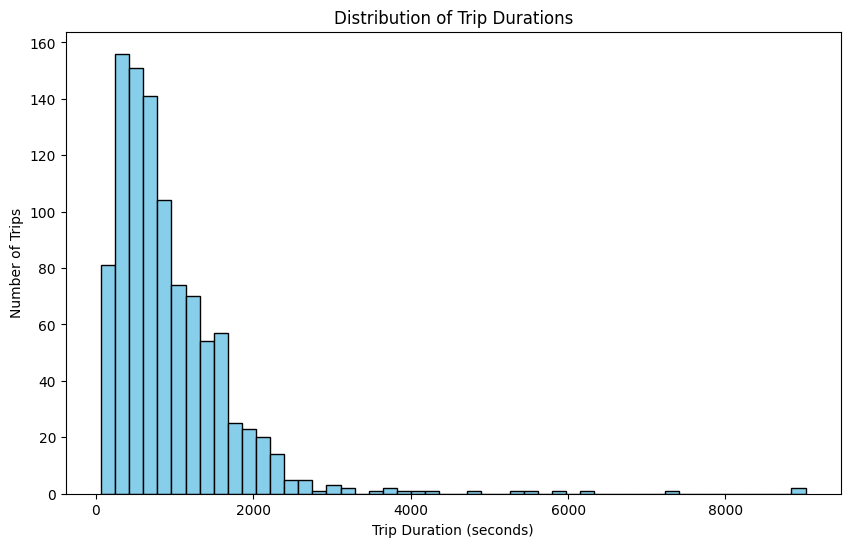

In [55]:
import matplotlib.pyplot as plt

# Plot a histogram of trip durations
plt.figure(figsize=(10, 6))
plt.hist(citibike_rides_subset['tripduration'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Number of Trips')
plt.title('Distribution of Trip Durations')
plt.show()

B. Box Plot: Trip Duration by User Type

We use the `seaborn` library to create a box plot, which visually compares the distribution of trip durations for different user types (e.g., Subscriber, Customer). Box plots are useful for identifying potential outliers and comparing the spread of data across different groups.

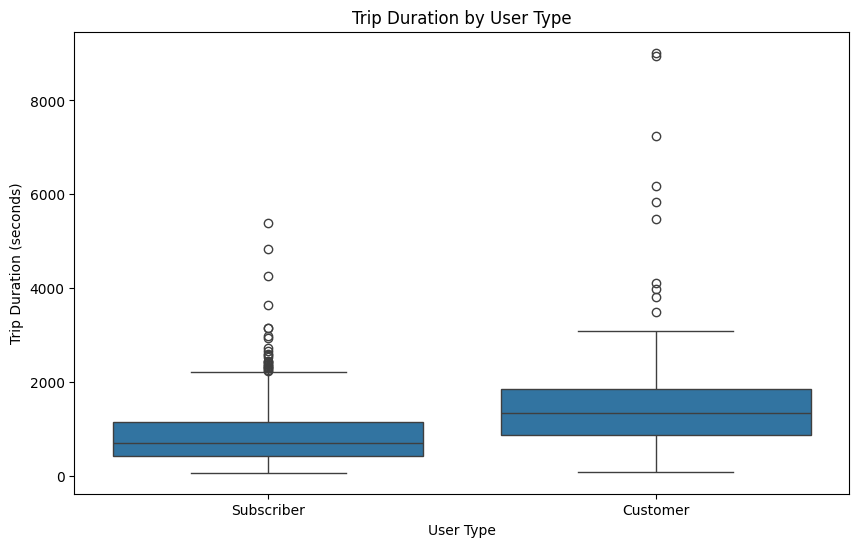

In [56]:
import seaborn as sns

# Create a box plot of trip duration by user type
plt.figure(figsize=(10, 6))
sns.boxplot(x='usertype', y='tripduration', data=citibike_rides_subset)
plt.xlabel('User Type')
plt.ylabel('Trip Duration (seconds)')
plt.title('Trip Duration by User Type')
plt.show()

C. Simple Bar Chart: Distribution of User Types

This visualization will show the distribution of user types (Subscriber vs. Customer) in the dataset. Subscribers have an annual pass.

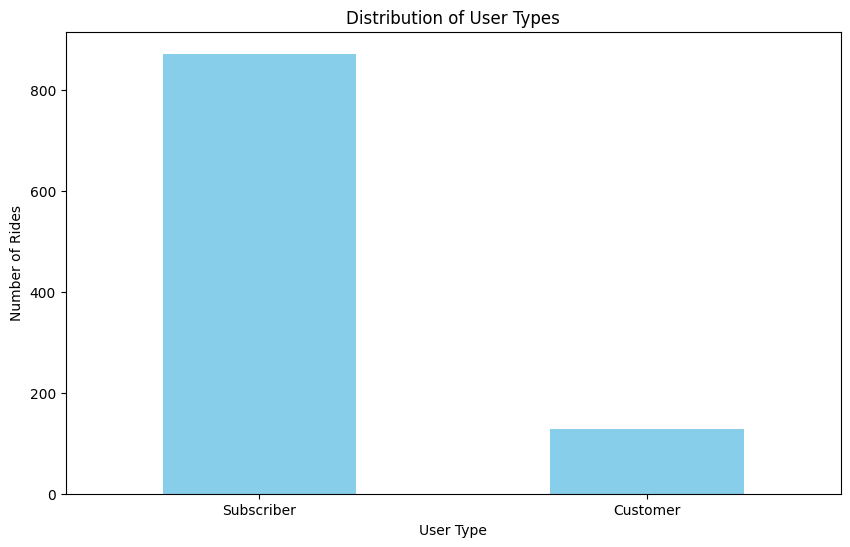

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Count occurrences of each user type
user_type_counts = citibike_rides_subset['usertype'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
user_type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of User Types')
plt.xlabel('User Type')
plt.ylabel('Number of Rides')
plt.xticks(rotation=360)
plt.show()

D. Scatter Plot with Age and Trip Duration

This visualization will explore the relationship between user age and trip duration.

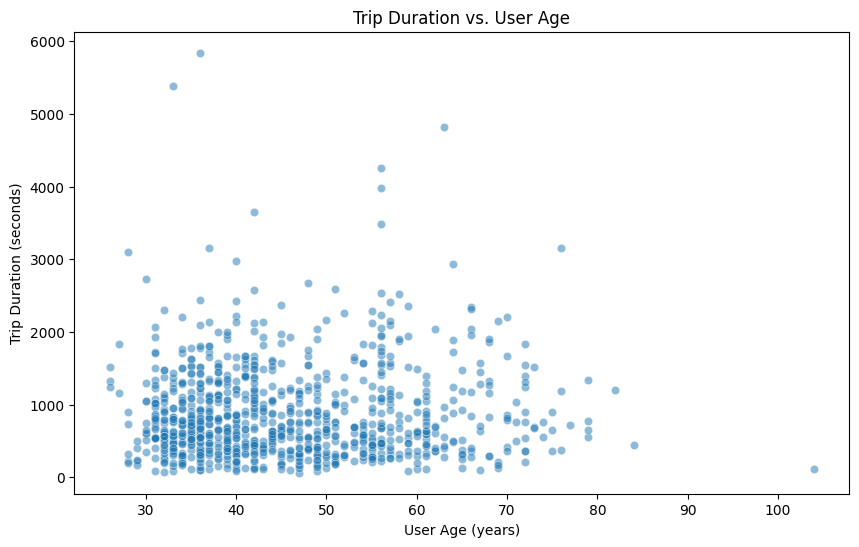

In [58]:
import seaborn as sns

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='tripduration', data=citibike_rides_subset, alpha=0.5)
plt.title('Trip Duration vs. User Age')
plt.xlabel('User Age (years)')
plt.ylabel('Trip Duration (seconds)')
plt.show()

**2. In R, build a series of data visualizations, from simple to advanced.**

A. Simple Histogram: Distribution of Trip Durations

We build a simple histogram to visualize the distribution of trip durations in the dataset.

In [59]:
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr

grdevices = importr('grDevices')  # Import the grDevices package

# Activate automatic conversion between pandas and R
pandas2ri.activate()

# For screen output (interactive use):
#grdevices.x11()
# Or grdevices.quartz() on macOS, grdevices.windows() on Windows

#For a pdf
grdevices.pdf("trip_duration_histogram.pdf")

robjects.r('''
# Create a histogram of trip durations
hist(citibike_rides_selected$tripduration,
     breaks = 50,
     col = "skyblue",
     border = "black",
     xlab = "Trip Duration (seconds)",
     ylab = "Number of Trips",
     main = "Distribution of Trip Durations")

''')

# Close the graphics device (very important!)
grdevices.dev_off()

# If you saved to a file, the plot will now be in the file.
# If you used x11() or windows(), the plot should appear in a new window.

array([1], dtype=int32)

B. Simple Bar Chart: Distribution of User Types

This visualization will show the distribution of user types (Subscriber vs. Customer) in the dataset. Subscribers have an annual pass.

In [60]:
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr

grdevices = importr('grDevices')  # Import the grDevices package

# Activate automatic conversion between pandas and R
pandas2ri.activate()

#For a pdf
grdevices.pdf("distribution_of_user_types.pdf")

robjects.r('''
# Count the occurrences of each user type
user_type_counts <- table(citibike_rides_selected$usertype)

# Create the bar plot
barplot(user_type_counts,
        main = "Distribution of User Types",
        xlab = "User Type",
        ylab = "Number of Rides",
        col = "lightblue")

''')
# Close the graphics device
grdevices.dev_off()

array([1], dtype=int32)

Thanks for your attention and engagement today! You're welcome to connect with me on LinkedIn (please remember to add a message to your connection request.)

### Optional Post-Workshop Setup: Python Environment for Data Analysis

During the workshop, programming will be completed in Google Colab, which runs in your web browser.

The tutorial below is an optional setup guide to help you set up and get familiar with managing a local Python environment. You can complete this in your own time after the workshop is concluded.

**Installation**

1. Install Anaconda/Miniconda:

Conda is a popular, free, open-source package and environment management system for setting up and managing Python environments.

Download and install Anaconda or Miniconda from the official website: https://www.anaconda.com/. Choose the version appropriate for your operating system (Windows, macOS, Linux).
Note: Miniconda is a smaller, more lightweight version of Anaconda. It may have limitations.

2. Install VS Code:

VS Code a popular, free IDE. You are welcome to use another IDE of choice. I will be using VS Code during this post-workshop tutorial.

Download and install VS Code from the official website: https://code.visualstudio.com/).

**Setup**

3. Create a working directory by either:

- Saving the downloaded workshop repository from GitHub as a folder, to a specific location. Remember it. Instructions in 4a.

- Cloning the GitHub repository and creating a branch. Instructions in 4b.(recommended)

4a. Launch VS Code and open the named folder

Click "Open Folder" (image below). Choose the folder designated for this workshop in Step #3.

![AddFolders](adding_folders_vs_code.png)


4b. Launch VS Code and clone the repository

Click "Clone Repository" and choose a storage location (image below). Use the GitHub repo URL.

![Clone](cloning_repositories_vs_code.png)


5. Set up your Python environment

**Windows Users, *read this***:

A. When you install Conda, there is an option to configure your environment variables. Subsequently, all conda functions, including `conda env create -f rpy2_workshop.yml` (creating a new environment) should work as expected.

B. If `conda env create -f rpy2_workshop.yml` throws errors, follow these steps:

Note: This assumes your terminal launches in Powershell.

In your terminal, run
`conda init powershell`

Then,
`$condaPath = "C:\Users\<YourUsername>\anaconda3"` # Replace with your actual file path

Then,
`$condaScriptsPath = "$condaPath\Scripts"`

And finally,
`[Environment]::SetEnvironmentVariable("Path", "$env:Path;$condaPath;$condaScriptsPath", "User")`

In your terminal in VS Code (see https://code.visualstudio.com/docs/terminal/basics), run the following (sans ``):

`conda env create -f rpy2_workshop.yml`

The first line of the yml file sets the new environment's name. It ensures that the libraries, versions and dependencies are set up precisely. Sometimes, one library needs an upgraded or downgraded version of another to run - this environment has them playing nicely.

Next, to activate the conda environment, run the following (sans ``):

`conda activate rpy2_workshop.yml`

More conda documentation and commands: https://docs.conda.io/projects/conda/en/latest/commands/index.html

6. Check your setup

You should see, to the far left of the command line prompt in your terminal window `(rpy2_workshop)`

To check your working directory, run the following (sans ``):

`pwd`

The printed path should match that of your folder from Step #3.

To verify that the environment you have matches the provided enviroment, run the following:

`conda list`

The list of libraries should match the content of the yml file (double-click on `rpy2_workshop.yml` and it will pop up in a new tab, adjacent to this notebook.)

Read the `citibike_trips_schema.xlsx` file to understand data definitions used for this workshop.

This concludes the post-workshop setup tutorial.